In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("Used_Bikes.csv")

In [56]:
df=df.drop(["city","bike_name"],axis=1)

In [57]:
df['age'].unique()

array([ 3.,  4.,  8.,  6.,  7.,  5.,  2., 16., 13.,  9., 10., 14., 12.,
       11.,  1., 15., 39., 17., 18., 30., 19., 23., 41., 27., 37., 24.,
       20., 43., 38., 63., 34., 31., 22., 26., 25.])

In [58]:
df['power'].min()

np.float64(100.0)

In [59]:
label_encoder_owner = LabelEncoder()

df["owner"]=label_encoder_owner.fit_transform(df["owner"])

In [60]:
df

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,0,3.0,110.0,TVS
1,119900.0,11000.0,0,4.0,350.0,Royal Enfield
2,600000.0,110.0,0,8.0,675.0,Triumph
3,65000.0,16329.0,0,4.0,180.0,TVS
4,80000.0,10000.0,0,3.0,150.0,Yamaha
...,...,...,...,...,...,...
32643,39000.0,22000.0,0,4.0,100.0,Hero
32644,30000.0,6639.0,0,9.0,180.0,TVS
32645,60000.0,20373.0,0,6.0,220.0,Bajaj
32646,15600.0,84186.0,0,16.0,125.0,Hero


In [61]:
onehot_encoder_brand=OneHotEncoder(handle_unknown='ignore')
geo_encoded = onehot_encoder_brand.fit_transform(df[['brand']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded,columns=onehot_encoder_brand.get_feature_names_out(['brand']))

In [62]:
geo_encoded_df


,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,brand_Honda,brand_Hyosung,brand_Ideal,brand_Indian,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32646,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df = pd.concat([df.drop('brand',axis=1),geo_encoded_df],axis=1)

In [64]:
df

,price,kms_driven,owner,age,power,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000.0,17654.0,0,3.0,110.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,119900.0,11000.0,0,4.0,350.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,600000.0,110.0,0,8.0,675.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,65000.0,16329.0,0,4.0,180.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,80000.0,10000.0,0,3.0,150.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,39000.0,22000.0,0,4.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32644,30000.0,6639.0,0,9.0,180.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32645,60000.0,20373.0,0,6.0,220.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32646,15600.0,84186.0,0,16.0,125.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X=df.drop(["price"],axis=1)
y=df["price"]

In [66]:
## split data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler= StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [67]:
df.isnull().sum()

price                    0
kms_driven               0
owner                    0
age                      0
power                    0
brand_BMW                0
brand_Bajaj              0
brand_Benelli            0
brand_Ducati             0
brand_Harley-Davidson    0
brand_Hero               0
brand_Honda              0
brand_Hyosung            0
brand_Ideal              0
brand_Indian             0
brand_Jawa               0
brand_KTM                0
brand_Kawasaki           0
brand_LML                0
brand_MV                 0
brand_Mahindra           0
brand_Rajdoot            0
brand_Royal Enfield      0
brand_Suzuki             0
brand_TVS                0
brand_Triumph            0
brand_Yamaha             0
brand_Yezdi              0
dtype: int64

In [68]:
with open('label_encoder_owner.pkl','wb') as file:
    pickle.dump(label_encoder_owner,file)

with open('onehot_encoder_brand.pkl','wb') as file:
    pickle.dump(onehot_encoder_brand,file)

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [69]:
## ANN with regression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae'])

C:\Users\verma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

log_dir = "regressionlogs/fit/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [73]:

## set up Early stopping

Early_Stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [74]:
## Train the model

history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=10,
    callbacks=[tensorboard_callback,Early_Stopping_callback]
)

Epoch 1/10
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 67718.3672 - mae: 67718.3672 - val_loss: 59952.4648 - val_mae: 59952.4648
Epoch 2/10
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 52939.7383 - mae: 52939.7383 - val_loss: 31754.7949 - val_mae: 31754.7949
Epoch 3/10
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 26369.9570 - mae: 26369.9570 - val_loss: 20285.0176 - val_mae: 20285.0176
Epoch 4/10
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18676.7480 - mae: 18676.7480 - val_loss: 15446.9619 - val_mae: 15446.9619
Epoch 5/10
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14460.9736 - mae: 14460.9736 - val_loss: 11480.0771 - val_mae: 11480.0771
Epoch 6/10
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10926.7910 - mae: 10926.7910 - val_loss: 10208.9609 - val_mae: 10208.9609
Epoch 7/10
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9876.7510 - mae: 9876.7510 - val_loss: 9828.2490 - val_mae: 9828.2490
Epoch 8/10
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9491.8

In [86]:
## Load Tensorboard Extension
%reload_ext tensorboard
%tensorboard --logdir regressionlogs/fit

Reusing TensorBoard on port 6006 (pid 8512), started 20:30:08 ago. (Use '!kill 8512' to kill it.)

In [76]:
test_loss,test_mae = model.evaluate(X_test,y_test)
print(f"Test MAE : {test_mae}")

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8674.0586 - mae: 8674.0586
Test MAE : 9256.4970703125


In [77]:
model.save('used_bikes.h5')

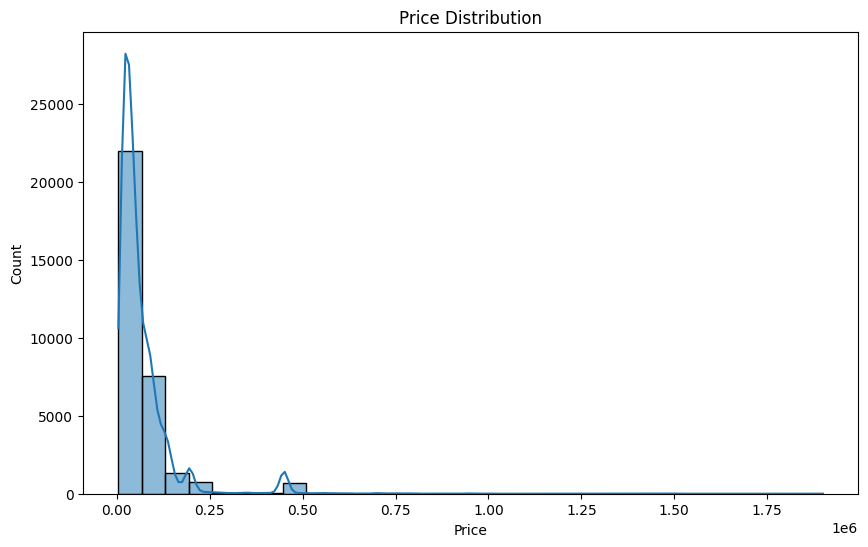

In [91]:
#Plot histogram of bike prices
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()



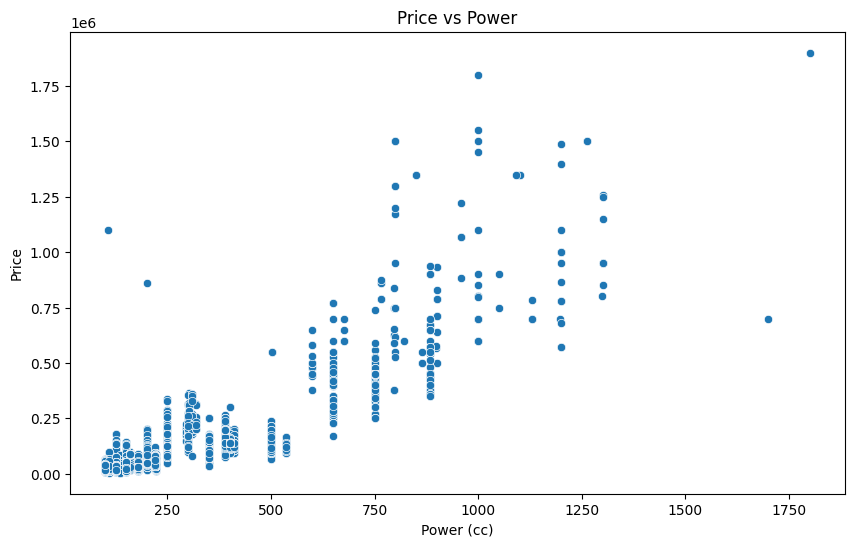

In [92]:
# Scatter plot of price vs power
plt.figure(figsize=(10,6))
sns.scatterplot(x='power', y='price', data=df)
plt.title('Price vs Power')
plt.xlabel('Power (cc)')
plt.ylabel('Price')
plt.show()


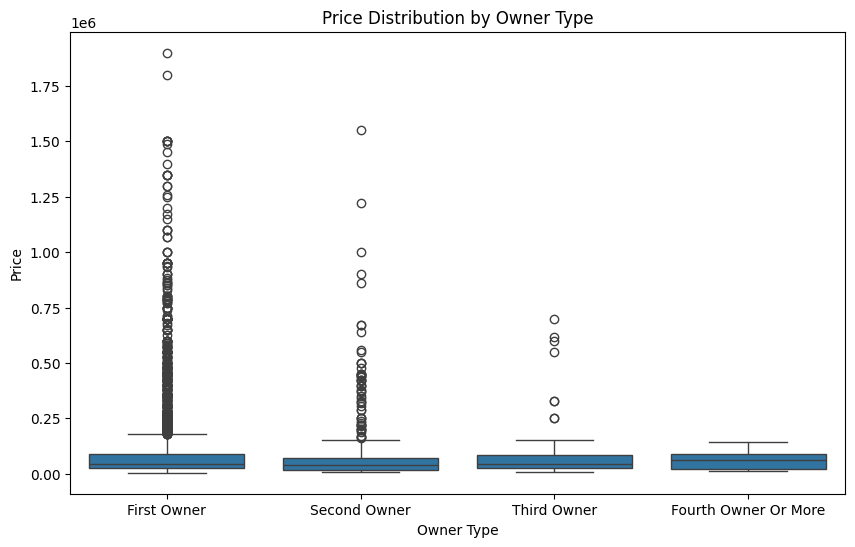

In [93]:
#Box plot of price by owner type
plt.figure(figsize=(10,6))
sns.boxplot(x='owner', y='price', data=df)
plt.title('Price Distribution by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Price')
plt.show()


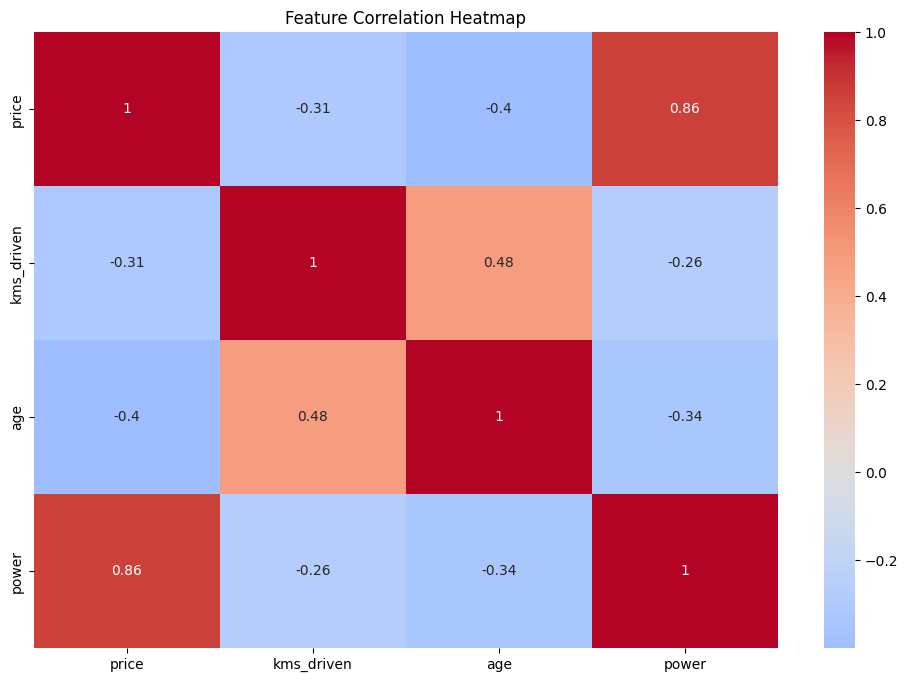

In [94]:
# Correlation heatmap of numeric features
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

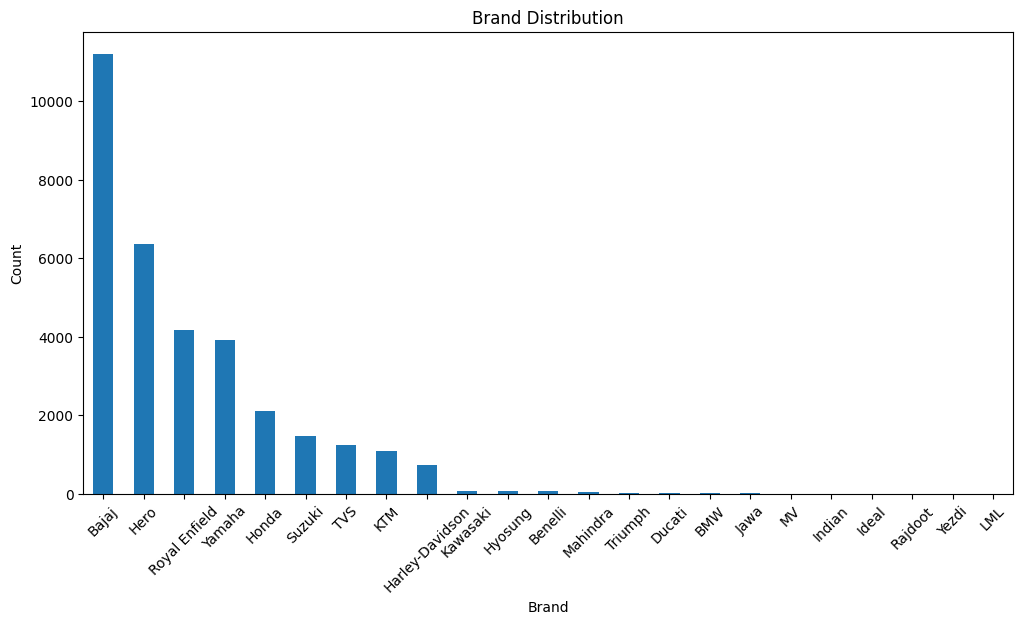

In [95]:
# Bar chart of brand distribution
plt.figure(figsize=(12,6))
df['brand'].value_counts().plot(kind='bar')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

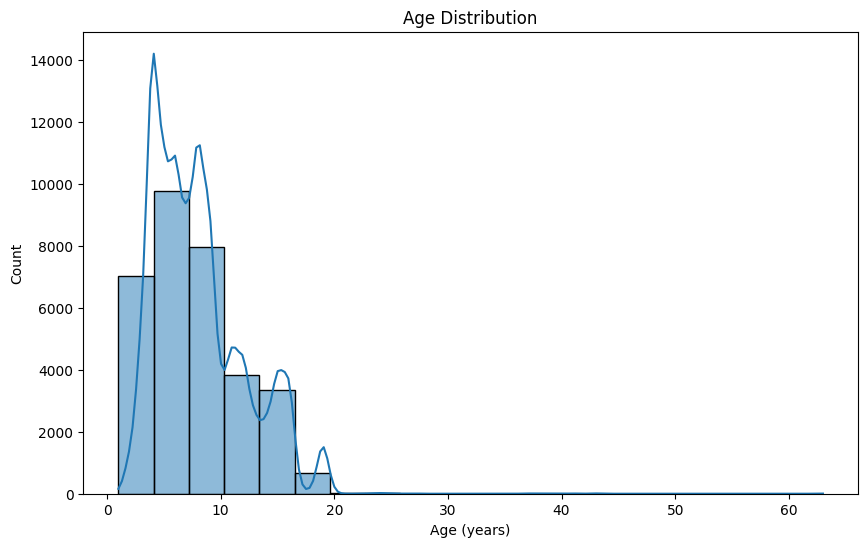

In [96]:
# Histogram of bike ages
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()